In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('data1990-2010.csv')
data

,country,city,start,end,Year,dengue,T_res
0,VIET NAM,NaN,1990-01-01,1990-12-31,1990,37569,Year
1,VIET NAM,NaN,1991-01-01,1991-12-31,1991,94630,Year
2,VIET NAM,NaN,1992-01-01,1992-12-31,1992,48333,Year
3,VIET NAM,NaN,1993-01-01,1993-12-31,1993,53674,Year
4,VIET NAM,NaN,1994-01-01,1994-12-31,1994,44944,Year
...,...,...,...,...,...,...,...
12289,VIET NAM,LAI CHAU,2010-12-01,2010-12-31,2010,0,Month
12290,VIET NAM,TUYEN QUANG,2010-12-01,2010-12-31,2010,0,Month
12291,VIET NAM,LAO CAI,2010-12-01,2010-12-31,2010,0,Month
12292,VIET NAM,CA MAU,2010-12-01,2010-12-31,2010,1921,Month


In [4]:
# Đếm số lần xuất hiện của mỗi năm trong cột 'Year'
year_counts = data['Year'].value_counts()
print(year_counts)

Year
2007    769
2006    769
2005    769
2004    769
2010    757
2009    757
2008    757
2001    733
2003    733
2002    733
2000    733
1999    733
1998    733
1997    731
1995    636
1996    630
1994    548
1991      1
1993      1
1992      1
1990      1
Name: count, dtype: int64


In [5]:
# Tính tổng số ca mắc cho mỗi tỉnh thành
total_dengue_by_city = data.groupby('city')['dengue'].sum()

# Sắp xếp các tỉnh thành theo tổng số ca mắc giảm dần
sorted_cities = total_dengue_by_city.sort_values(ascending=False)

# Chọn 20 tỉnh thành có tổng số ca mắc cao nhất
top_20_cities = sorted_cities.head(20)
print(top_20_cities)

city
HO CHI MINH CITY    115304
TIEN GIANG           83373
BEN TRE              82532
DONG THAP            72717
BINH THUAN           68206
CA MAU               68024
AN GIANG             67580
KIEN GIANG           66764
DONG NAI             63879
SOC TRANG            52894
KHANH HOA            48172
LONG AN              42125
TRA VINH             34499
BINH DUONG           33912
HA NOI CITY          32112
PHU YEN              30759
NINH THUAN           29003
CAN THO CITY         28860
DAK LAK              27263
BINH PHUOC           25059
Name: dengue, dtype: int64


In [6]:
# Lọc dữ liệu theo các thành phố trong top 20
df = data[data['city'].isin(top_20_cities.index)]
print(df)

        country              city       start         end  Year  dengue  T_res
5      VIET NAM           DAK LAK  1994-02-01  1994-02-28  1994       3  Month
6      VIET NAM          DONG NAI  1994-02-01  1994-02-28  1994      37  Month
7      VIET NAM           LONG AN  1994-02-01  1994-02-28  1994      12  Month
8      VIET NAM      CAN THO CITY  1994-02-01  1994-02-28  1994      11  Month
9      VIET NAM         DONG THAP  1994-02-01  1994-02-28  1994      16  Month
...         ...               ...         ...         ...   ...     ...    ...
12278  VIET NAM  HO CHI MINH CITY  2010-12-01  2010-12-31  2010     422  Month
12280  VIET NAM        TIEN GIANG  2010-12-01  2010-12-31  2010     539  Month
12281  VIET NAM         KHANH HOA  2010-12-01  2010-12-31  2010     198  Month
12288  VIET NAM          TRA VINH  2010-12-01  2010-12-31  2010     165  Month
12292  VIET NAM            CA MAU  2010-12-01  2010-12-31  2010    1921  Month

[4011 rows x 7 columns]


In [7]:
year_counts = df['Year'].value_counts()
print(year_counts)

Year
2002    240
2003    240
2009    240
2008    240
2007    240
2006    240
2005    240
2004    240
2010    240
2001    240
2000    240
1999    240
1998    240
1997    240
1995    228
1996    224
1994    199
Name: count, dtype: int64


In [32]:
# Tính tổng số dòng và cột
num_rows, num_columns = df.shape

# Kiểm tra giá trị thiếu
missing_values = df.isnull().sum()

# Mô tả thống kê của cột "dengue"
dengue_stats = df['dengue'].describe()

# Mối quan hệ giữa năm và số ca mắc
yearly_trend = df.groupby('Year')['dengue'].sum()

# Mối quan hệ giữa thành phố và số ca mắc
city_dengue_stats = df.groupby('city')['dengue'].sum().sort_values(ascending=False)

# Xu hướng thời gian
data['start'] = pd.to_datetime(df['start'])
time_trend = df.groupby('start')['dengue'].sum()

# Hiển thị tóm tắt
print(f"1. Thông tin cơ bản về dữ liệu:")
print(f"- Tổng số dòng: {num_rows}")
print(f"- Tổng số cột: {num_columns}\n")

print(f"2. Kiểm tra giá trị thiếu:")
print(missing_values)
print("\n")

print(f"3. Mô tả thống kê của cột 'dengue':")
print(dengue_stats)
print("\n")

print(f"4. Mối quan hệ giữa các biến:")
print(f"- Mối quan hệ giữa năm và số ca mắc:")
print(yearly_trend)
print("\n")

print(f"- Mối quan hệ giữa thành phố và số ca mắc:")
print(city_dengue_stats.head(10))  # Hiển thị 10 thành phố có số ca mắc cao nhất
print("\n")



1. Thông tin cơ bản về dữ liệu:
- Tổng số dòng: 4011
- Tổng số cột: 7

2. Kiểm tra giá trị thiếu:
country    0
city       0
start      0
end        0
Year       0
dengue     0
T_res      0
dtype: int64


3. Mô tả thống kê của cột 'dengue':
count    4011.000000
mean      267.523560
std       400.042181
min         0.000000
25%        50.000000
50%       132.000000
75%       325.500000
max      7265.000000
Name: dengue, dtype: float64


4. Mối quan hệ giữa các biến:
- Mối quan hệ giữa năm và số ca mắc:
Year
1994     32718
1995     63365
1996     70996
1997     88603
1998    149027
1999     27179
2000     21861
2001     34142
2002     24397
2003     39366
2004     63742
2005     50064
2006     55822
2007     91418
2008     81583
2009     89499
2010     89255
Name: dengue, dtype: int64


- Mối quan hệ giữa thành phố và số ca mắc:
city
HO CHI MINH CITY    115304
TIEN GIANG           83373
BEN TRE              82532
DONG THAP            72717
BINH THUAN           68206
CA MAU               6

In [11]:

max_dengue_row = df.loc[df['dengue'].idxmax()]

print(max_dengue_row)

country      VIET NAM
city          BEN TRE
start      1998-08-01
end        1998-08-31
Year             1998
dengue           7265
T_res           Month
Name: 3008, dtype: object


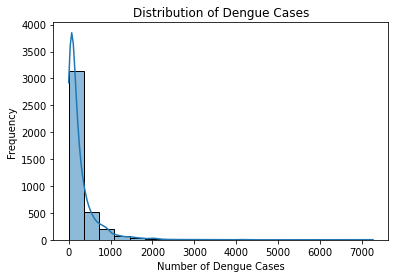

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['dengue'], bins=20, kde=True)
plt.xlabel('Number of Dengue Cases')
plt.ylabel('Frequency')
plt.title('Distribution of Dengue Cases')
plt.show()

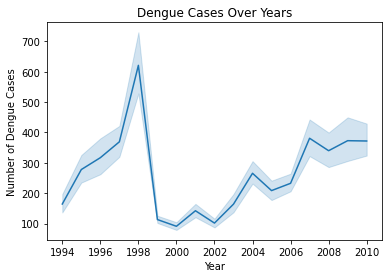

In [13]:
# Số ca mắc theo năm 
sns.lineplot(x='Year', y='dengue', data=df)
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.title('Dengue Cases Over Years')
plt.show()

/var/folders/6w/n21p66td2895by94s7yx_2f40000gn/T/ipykernel_3016/587581653.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='dengue', data=df, ci=None)


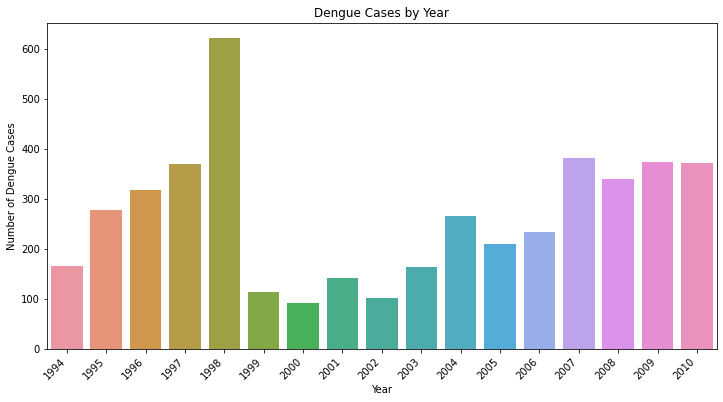

In [23]:
# biểu đồ cột số ca mắc theo năm
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='dengue', data=df, ci=None)
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.title('Dengue Cases by Year')
plt.xticks(rotation=45, ha='right')
plt.show()

/var/folders/6w/n21p66td2895by94s7yx_2f40000gn/T/ipykernel_3016/278619274.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='dengue', data=df, ci=None)


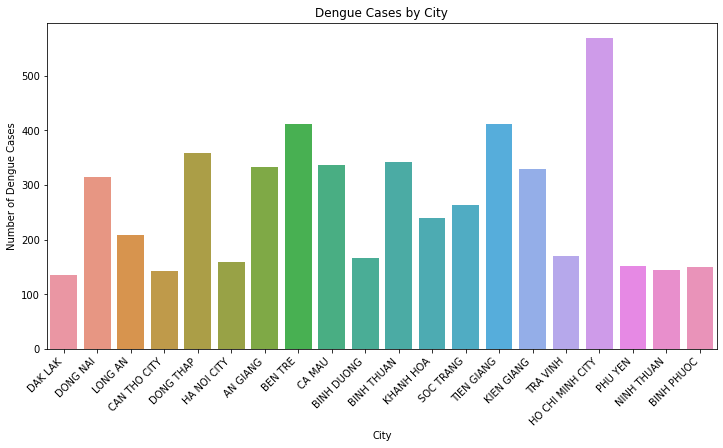

In [14]:
# số ca mắc theo thành phố
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='dengue', data=df, ci=None)
plt.xlabel('City')
plt.ylabel('Number of Dengue Cases')
plt.title('Dengue Cases by City')
plt.xticks(rotation=45, ha='right')
plt.show()

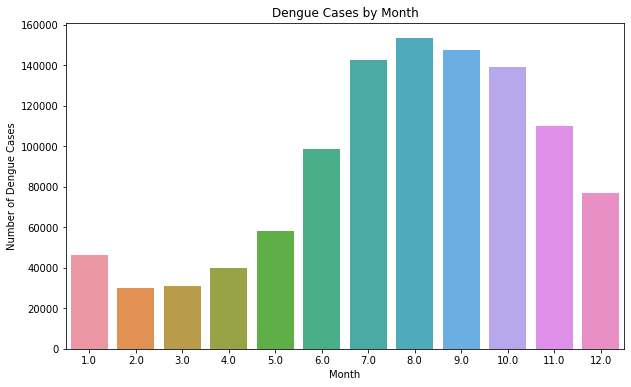

In [33]:
# Tạo cột 'month' để lưu trữ thông tin tháng
data['start'] = pd.to_datetime(df['start'])
data['month'] = df['start'].dt.month
monthly_dengue = data.groupby('month')['dengue'].sum().reset_index()

# số ca mắc theo tháng
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='dengue', data=monthly_dengue)
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.title('Dengue Cases by Month')
plt.show()

Ta có thể thấy vào tháng 8 số ca mắc sốt xuất huyết tăng cao nhất, thời tiết thời gian này mưa nhiều và độ ẩm cao, và số ca mắc có tính chu kì theo năm, phù hợp với đồ thị số ca mắc theo năm. 

/var/folders/6w/n21p66td2895by94s7yx_2f40000gn/T/ipykernel_3016/2676139690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start'] = pd.to_datetime(df['start'])
/var/folders/6w/n21p66td2895by94s7yx_2f40000gn/T/ipykernel_3016/2676139690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end'] = pd.to_datetime(df['end'])


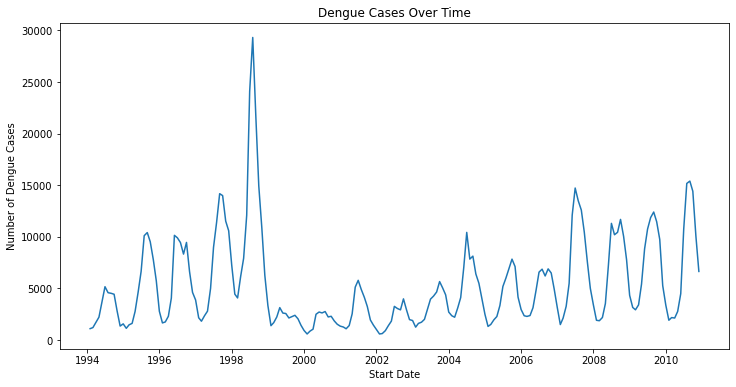

In [35]:
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])
time_trend = df.groupby('start')['dengue'].sum()
plt.figure(figsize=(12, 6))

plt.plot(time_trend.index, time_trend.values)
plt.xlabel('Start Date')
plt.ylabel('Number of Dengue Cases')
plt.title('Dengue Cases Over Time')
plt.show()

dịch sốt xuất huyết có tính chu kì theo thời gian

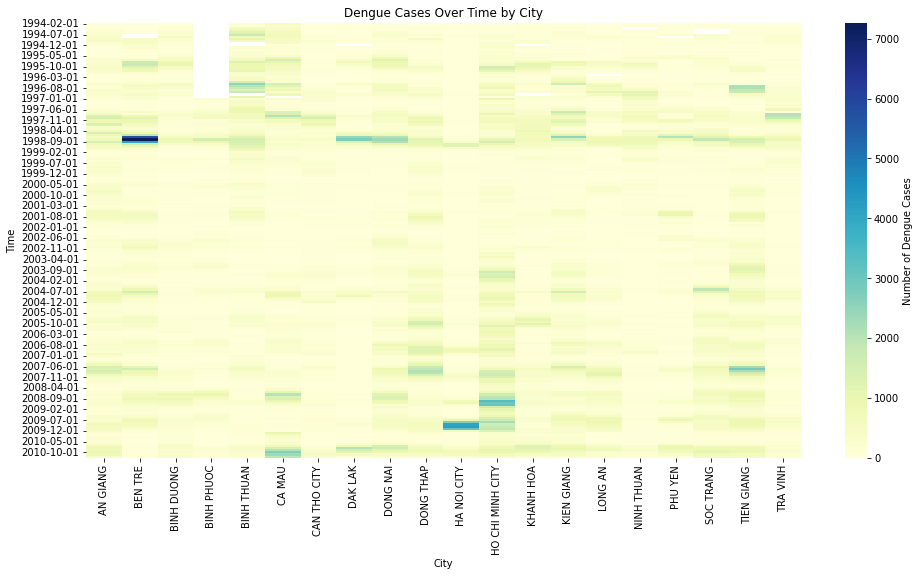

In [17]:
# Biểu đồ heatmap theo thời gian và thành phố
# Chuyển đổi cột 'start' thành định dạng datetime
data['start'] = pd.to_datetime(data['start']).dt.date

# Tạo DataFrame với chỉ số là 'start', cột là 'city', và giá trị là 'dengue'
heatmap_data = data.pivot_table(index='start', columns='city', values='dengue', aggfunc='sum')

# Vẽ heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Number of Dengue Cases'})
plt.title('Dengue Cases Over Time by City')
plt.xlabel('City')
plt.ylabel('Time')
plt.show()

từ heatmap ta thấy năm 1998 bùng phát dịch so với các năm khác

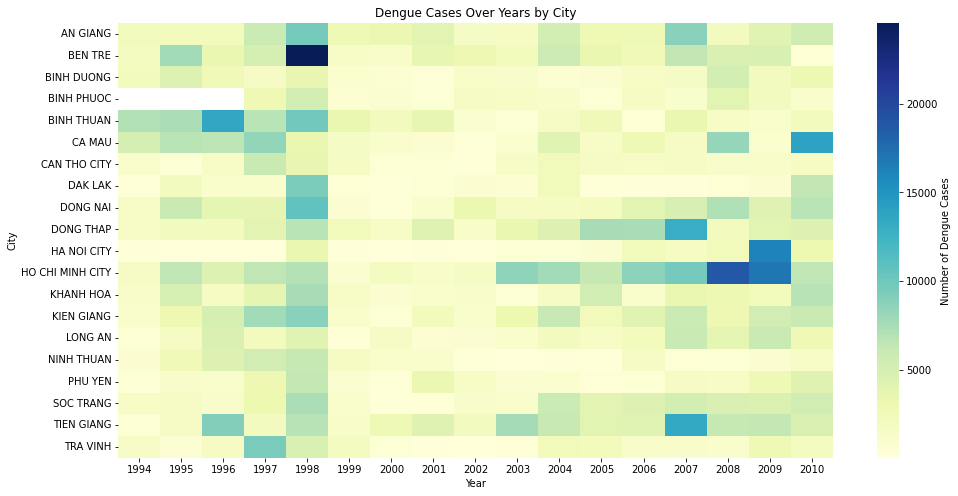

In [34]:
# Tạo DataFrame với chỉ số là 'city', cột là 'Year', và giá trị là tổng số ca mắc dengue trong năm đó cho từng thành phố
heatmap_data = df.groupby(['city', 'Year'])['dengue'].sum().unstack()

# Vẽ heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Number of Dengue Cases'})
plt.title('Dengue Cases Over Years by City')
plt.xlabel('Year')
plt.ylabel('City')
plt.show()

In [31]:
# Chuyển đổi cột 'start' và 'end' thành định dạng datetime để trích xuất thông tin tháng
data['start'] = pd.to_datetime(data['start'])
data['end'] = pd.to_datetime(data['end'])

# Tạo cột 'month' để lưu trữ thông tin tháng
data['month'] = data['start'].dt.month

# Thống kê số ca mắc dengue theo tháng, country và year
result_data = data.groupby(['country', 'Year', 'month','start','end'], as_index=False)['dengue'].sum()

# Lưu kết quả vào file CSV mới
result_data.to_csv('data1994-2010.csv', index=False)